## make sure you have all libraries installed. 
use conda environment: /scratch/da2734/twitter/worldbank_twitter_environment.yml

# loading random samples

In [1]:
# random contains 0.8G of data!!
import time
start_time = time.time()
import pyarrow.parquet as pq
from glob import glob
import os
country_code = 'US'
month = '2012-1'
path_to_data = '/scratch/spf248/twitter/data/classification/US/random_10perct_sample/'
tweets_random=pq.ParquetDataset(glob(os.path.join(path_to_data,                                           
#                                            country_code,
#                                            month,
                                           '*.parquet'))).read().to_pandas()
tweets_random['tweet_id'] = tweets_random['tweet_id'].astype(int)
print('time taken to load random sample:', str(time.time() - start_time), 'seconds')
print(tweets_random.shape)

time taken to load random sample: 16.70641016960144 seconds
(9468992, 11)


# outputting 1M (pinky finger up) tweets by column

In [2]:
# outputting 1M (pinky finger up) tweets by column
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from scipy.special import softmax

import numpy as np
boundary_list = [i/10.0 for i in range(11)]
boundary_list.reverse()

print('boundary_list', boundary_list)


for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print('\n\n', column)
    
#     if column != 'job_search': continue
    
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_BERT/{}/'.format(column)
    print(model_output_path)

    start_time = time.time()
    model_output_random = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'random*.csv')], ignore_index = True)
    print('time taken to load random sample:', str(time.time() - start_time), 'seconds', model_output_random.shape)

    start_time = time.time()
    merged_random = pd.merge(model_output_random, tweets_random, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_random.shape)

    start_time = time.time()
#     based on https://github.com/ThilinaRajapakse/simpletransformers/issues/30
    merged_random[['neg', 'pos_model']] = softmax(merged_random[['first', 'second']], axis=1)
    print('time softmax:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     pickle.dump( merged_random, open( "./pickles/{}_BERT_ST_merged_random_1pct.pkl".format(column), "wb" ) )
#     print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_random   = merged_random[['tweet_id', 'pos_model', 'text']]
#     print(merged_random.head())
    
#     merged_random   = merged_random[['tweet_id', 'glove_pos_model', 'text']]
    merged_random.columns = ['tweet_id', '{}'.format(column), 'text']
    
#     print(merged_random.shape())
    
    merged_random = merged_random.drop_duplicates(['text'])
    
    
    if column == 'is_unemployed':
        multi_col_all_tweets = merged_random
    else:
        multi_col_all_tweets = pd.merge(multi_col_all_tweets, merged_random, how='inner', on = 'tweet_id')
    
    print(multi_col_all_tweets.shape)
    print(multi_col_all_tweets.head())

    
#     break
multi_col_all_tweets = multi_col_all_tweets[['tweet_id', 'text', "is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]]
multi_col_all_tweets.head()
multi_col_all_tweets.to_parquet('turk10M/multi_col_all_tweets_BERT_random.parquet')

boundary_list [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


 is_unemployed
/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_BERT/is_unemployed/
time taken to load random sample: 14.539019107818604 seconds (9440641, 3)
time taken to merge: 8.181419372558594 seconds (9440641, 13)
time softmax: 1.479945182800293 seconds
             tweet_id  pos_model  \
0  367919800611508224   0.662139   
1  367932697781350400   0.189844   
2  367935721836777472   0.095190   
3  367937185946673153   0.070781   
4  367937491913150464   0.316167   

                                                text  
0                                           There :)  
1  RT @ReaILilTunechi: Relationships work best wh...  
2  I hate when im watching a movie and I stay on ...  
3           @nakiyakoker_ good. What about yourself?  
4       If a girl can make me laugh she had my heart  
(9231120, 3)
             tweet_id  is_unemployed  \
0  367919800611508224       0.662139   
1

time taken to load random sample: 14.37619948387146 seconds (9440641, 3)
time taken to merge: 8.115370273590088 seconds (9440641, 13)
time softmax: 1.4379093647003174 seconds
             tweet_id  pos_model  \
0  367919800611508224   0.062321   
1  367932697781350400   0.088753   
2  367935721836777472   0.027335   
3  367937185946673153   0.045460   
4  367937491913150464   0.064940   

                                                text  
0                                           There :)  
1  RT @ReaILilTunechi: Relationships work best wh...  
2  I hate when im watching a movie and I stay on ...  
3           @nakiyakoker_ good. What about yourself?  
4       If a girl can make me laugh she had my heart  
(9231120, 11)
             tweet_id  is_unemployed  \
0  367919800611508224       0.662139   
1  367932697781350400       0.189844   
2  367935721836777472       0.095190   
3  367937185946673153       0.070781   
4  367937491913150464       0.316167   

                       

boundary_list [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


 is_unemployed
/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_BERT/is_unemployed/
time taken to load random sample: 14.329328536987305 seconds (9440641, 3)
time taken to merge: 7.808764457702637 seconds (9440641, 13)
time softmax: 1.4628911018371582 seconds
             tweet_id  pos_model  \
0  367919800611508224   0.662139   
1  367932697781350400   0.189844   
2  367935721836777472   0.095190   
3  367937185946673153   0.070781   
4  367937491913150464   0.316167   

                                                text  
0                                           There :)  
1  RT @ReaILilTunechi: Relationships work best wh...  
2  I hate when im watching a movie and I stay on ...  
3           @nakiyakoker_ good. What about yourself?  
4       If a girl can make me laugh she had my heart  
random          pos_model                                  text
2441891   0.938718           

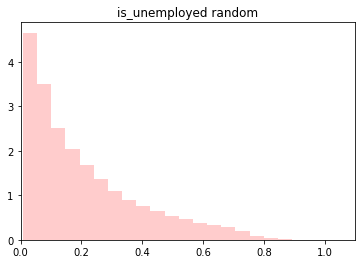

In [2]:
# outputting 1M (pinky finger up) tweets by column
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from scipy.special import softmax

import numpy as np
boundary_list = [i/10.0 for i in range(11)]
boundary_list.reverse()

print('boundary_list', boundary_list)


for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print('\n\n', column)
    
#     if column != 'job_search': continue
    
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_BERT/{}/'.format(column)
    print(model_output_path)

    start_time = time.time()
    model_output_random = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'random*.csv')], ignore_index = True)
    print('time taken to load random sample:', str(time.time() - start_time), 'seconds', model_output_random.shape)

    start_time = time.time()
    merged_random = pd.merge(model_output_random, tweets_random, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_random.shape)

    start_time = time.time()
#     based on https://github.com/ThilinaRajapakse/simpletransformers/issues/30
    merged_random[['neg', 'pos_model']] = softmax(merged_random[['first', 'second']], axis=1)
    print('time softmax:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     pickle.dump( merged_random, open( "./pickles/{}_BERT_ST_merged_random_1pct.pkl".format(column), "wb" ) )
#     print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_random   = merged_random[['tweet_id', 'pos_model', 'text']]
    print(merged_random.head())
    
    
    merged_random = merged_random.drop_duplicates(['text'])
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_random['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' random')
#     ax.set_yscale('log')
    plt.xlim(0,1.1)
    
    start_time = time.time()
    sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=False)
    print('random', sort_merged_random[['pos_model', 'text']].head())
    sort_merged_random = sort_merged_random[['tweet_id', 'pos_model', 'text']]
    sort_merged_random.to_csv('turk1M/BERT_ST_random_pos_1000_{}.csv'.format(column), index = False)
    pickle.dump( sort_merged_random, open( 'turk1M/BERT_ST_random_pos_1000_{}.pickle'.format(column), "wb" ) )
    sort_merged_random.to_parquet('turk1M/BERT_ST_random_pos_1000_{}.parquet'.format(column))
    
    print('sort', str(time.time() - start_time), 'seconds')
    break


# random steps of 0.1 boundary

boundary_list [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


 is_unemployed
/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_BERT/is_unemployed/
time taken to load random sample: 4.154649496078491 seconds (9440641, 3)
time taken to merge: 7.946799993515015 seconds (9440641, 13)
time softmax: 1.4108667373657227 seconds
             tweet_id  pos_model  \
0  367919800611508224   0.662139   
1  367932697781350400   0.189844   
2  367935721836777472   0.095190   
3  367937185946673153   0.070781   
4  367937491913150464   0.316167   

                                                text  
0                                           There :)  
1  RT @ReaILilTunechi: Relationships work best wh...  
2  I hate when im watching a movie and I stay on ...  
3           @nakiyakoker_ good. What about yourself?  
4       If a girl can make me laugh she had my heart  
boundary 1.0
is_unemployed random subtraction time taken: 2.1457672119140625e-06 seconds
is_un

job_search random sorting time taken: 1.7954537868499756 seconds
(2000, 3)
job_search random write csv time taken: 0.0025167465209960938 seconds
boundary 0.7
job_search random subtraction time taken: 2.384185791015625e-06 seconds
job_search random sorting time taken: 1.7545881271362305 seconds
(2000, 3)
job_search random write csv time taken: 0.002541065216064453 seconds
boundary 0.6
job_search random subtraction time taken: 2.384185791015625e-06 seconds
job_search random sorting time taken: 1.853661298751831 seconds
(2000, 3)
job_search random write csv time taken: 0.002644777297973633 seconds
boundary 0.5
job_search random subtraction time taken: 2.86102294921875e-06 seconds
job_search random sorting time taken: 2.0755224227905273 seconds
(2000, 3)
job_search random write csv time taken: 0.0025599002838134766 seconds
boundary 0.4
job_search random subtraction time taken: 2.1457672119140625e-06 seconds
job_search random sorting time taken: 2.3395872116088867 seconds
(2000, 3)
job_sear

job_offer random sorting time taken: 2.6976916790008545 seconds
(2000, 3)
job_offer random write csv time taken: 0.002434253692626953 seconds
boundary 0.0
job_offer random subtraction time taken: 2.384185791015625e-06 seconds
job_offer random sorting time taken: 2.6617281436920166 seconds
(2000, 3)
job_offer random write csv time taken: 0.002426624298095703 seconds


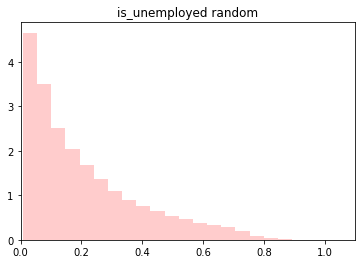

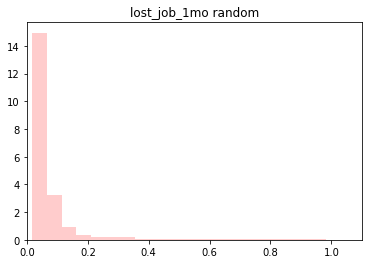

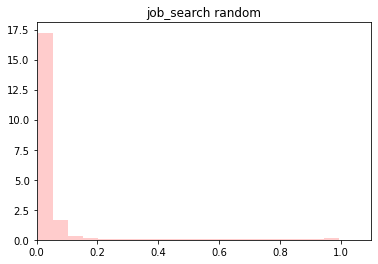

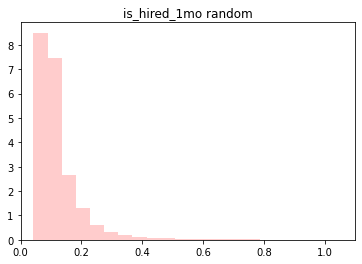

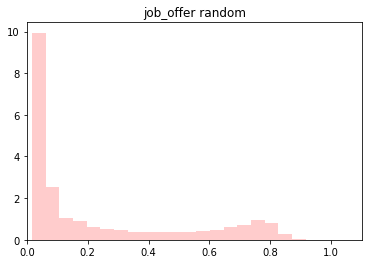

In [3]:
# all in one loop
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from scipy.special import softmax

import numpy as np
boundary_list = [i/10.0 for i in range(11)]
boundary_list.reverse()

print('boundary_list', boundary_list)


for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print('\n\n', column)
    
#     if column != 'job_search': continue
    
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_BERT/{}/'.format(column)
    print(model_output_path)

    start_time = time.time()
    model_output_random = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'random*.csv')], ignore_index = True)
    print('time taken to load random sample:', str(time.time() - start_time), 'seconds', model_output_random.shape)

    start_time = time.time()
    merged_random = pd.merge(model_output_random, tweets_random, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_random.shape)

    start_time = time.time()
#     based on https://github.com/ThilinaRajapakse/simpletransformers/issues/30
    merged_random[['neg', 'pos_model']] = softmax(merged_random[['first', 'second']], axis=1)
    print('time softmax:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     pickle.dump( merged_random, open( "./pickles/{}_BERT_ST_merged_random_1pct.pkl".format(column), "wb" ) )
#     print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_random   = merged_random[['tweet_id', 'pos_model', 'text']]
    print(merged_random.head())
    
    
    merged_random = merged_random.drop_duplicates(['text'])
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_random['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' random')
#     ax.set_yscale('log')
    plt.xlim(0,1.1)
    
#     start_time = time.time()
#     sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=False)
#     print('random', sort_merged_random[['pos_model', 'text']].head())
#     sort_merged_random = sort_merged_random[['tweet_id', 'pos_model', 'text']]
#     sort_merged_random.head(1000).to_csv('csv/BERT_ST_random_pos_1000_{}.csv'.format(column), index = False)
#     print('sort', str(time.time() - start_time), 'seconds')

    all_tweets_for_sam = pd.DataFrame()
    for boundary in boundary_list:
        
        print('boundary', boundary)
        
#         boundary = boundary_dict['random'][column]
        merged_random['dist_point{}'.format(boundary)] = abs(merged_random['pos_model'] - boundary)

        start_time = time.time()
        print(column, 'random subtraction time taken:', str(time.time() - start_time), 'seconds')

        start_time = time.time()
        merged_random = merged_random.sort_values(by=['dist_point{}'.format(boundary)], ascending=True)
        print(column, 'random sorting time taken:', str(time.time() - start_time), 'seconds')

        start_time = time.time()
        
        data_to_export = merged_random[:2000][['tweet_id', 'pos_model', 'text']]
        
#         del merged_random
        
        print(data_to_export.shape)
#         data_to_export.to_csv('csv_boundary_step/BERT_ST_random_{}_point_{}.csv'.format(column, boundary))
        # print(all_random_boundary['text'])
        print(column, 'random write csv time taken:', str(time.time() - start_time), 'seconds')   

        all_tweets_for_sam = pd.concat([all_tweets_for_sam, data_to_export])
    
#         break
        
    all_tweets_for_sam.to_csv('csv_boundary_step/BERT_ST_random_ALL_{}.csv'.format(column), index = False)
    
#     break

# loading filtered samples

In [3]:
# filtered contains 0.8G of data!!
import time
start_time = time.time()
import pyarrow.parquet as pq
from glob import glob
import os
country_code = 'US'
month = '2012-1'
path_to_data = '/scratch/spf248/twitter/data/classification/US/filtered_10perct_sample/'
tweets_filtered=pq.ParquetDataset(glob(os.path.join(path_to_data,                                           
#                                            country_code,
#                                            month,
                                           '*.parquet'))).read().to_pandas()
tweets_filtered['tweet_id'] = tweets_filtered['tweet_id'].astype(int)
print('time taken to load filtered sample:', str(time.time() - start_time), 'seconds')
print(tweets_filtered.shape)

time taken to load filtered sample: 16.394561290740967 seconds
(9215824, 11)


In [4]:
# outputting 1M (pinky finger up) tweets by column
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from scipy.special import softmax

import numpy as np
boundary_list = [i/10.0 for i in range(11)]
boundary_list.reverse()

print('boundary_list', boundary_list)


for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print('\n\n', column)
    
#     if column != 'job_search': continue
    
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_BERT/{}/'.format(column)
    print(model_output_path)

    start_time = time.time()
    model_output_filtered = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'filtered*.csv')], ignore_index = True)
    print('time taken to load filtered sample:', str(time.time() - start_time), 'seconds', model_output_filtered.shape)

    start_time = time.time()
    merged_filtered = pd.merge(model_output_filtered, tweets_filtered, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
#     based on https://github.com/ThilinaRajapakse/simpletransformers/issues/30
    merged_filtered[['neg', 'pos_model']] = softmax(merged_filtered[['first', 'second']], axis=1)
    print('time softmax:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     pickle.dump( merged_filtered, open( "./pickles/{}_BERT_ST_merged_filtered_1pct.pkl".format(column), "wb" ) )
#     print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_filtered   = merged_filtered[['tweet_id', 'pos_model', 'text']]
#     print(merged_filtered.head())
    
#     merged_filtered   = merged_filtered[['tweet_id', 'glove_pos_model', 'text']]
    merged_filtered.columns = ['tweet_id', '{}'.format(column), 'text']
    
#     print(merged_filtered.shape())
    
    merged_filtered = merged_filtered.drop_duplicates(['text'])
    
    
    if column == 'is_unemployed':
        multi_col_all_tweets = merged_filtered
    else:
        multi_col_all_tweets = pd.merge(multi_col_all_tweets, merged_filtered, how='inner', on = 'tweet_id')
    
    print(multi_col_all_tweets.shape)
    print(multi_col_all_tweets.head())

    
#     break
multi_col_all_tweets = multi_col_all_tweets[['tweet_id', 'text', "is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]]
multi_col_all_tweets.head()
multi_col_all_tweets.to_parquet('turk10M/multi_col_all_tweets_BERT_filtered.parquet')

boundary_list [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


 is_unemployed
/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_BERT/is_unemployed/
time taken to load filtered sample: 14.733699798583984 seconds (9026993, 3)
time taken to merge: 7.70441198348999 seconds (9026993, 13)
time softmax: 1.3393235206604004 seconds
(8446722, 3)
              tweet_id  is_unemployed  \
0  1000001555674882048       0.094048   
1  1000003879344336903       0.187957   
2  1000013178112266241       0.011999   
3  1000024729200222208       0.212617   
4  1000026549540794368       0.085735   

                                                text  
0  A work of art. #livemoreworryless https://t.co...  
1  Now hiring for 14 #job opportunities at Ryder ...  
2  What Makes The Healthy Workplace Nudge Differe...  
3  Ahh ❤️😌😍 I told Steven that Luna was sick yest...  
4  RT @Evan_McMullin: A spy is an American under ...  


 lost_job_1mo
/scratch/da2734/twitter/jobs/runn

# filtered steps of 0.1 boundary

boundary_list [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


 is_unemployed
/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_BERT/is_unemployed/
time taken to load filtered sample: 13.469018459320068 seconds (9026993, 3)
time taken to merge: 7.485039234161377 seconds (9026993, 13)
time softmax: 1.3290717601776123 seconds
boundary 1.0
is_unemployed filtered subtraction time taken: 2.1457672119140625e-06 seconds
is_unemployed filtered sorting time taken: 4.615224599838257 seconds
(2000, 3)
is_unemployed filtered write csv time taken: 0.002180814743041992 seconds
boundary 0.9
is_unemployed filtered subtraction time taken: 2.1457672119140625e-06 seconds
is_unemployed filtered sorting time taken: 1.5814785957336426 seconds
(2000, 3)
is_unemployed filtered write csv time taken: 0.0024716854095458984 seconds
boundary 0.8
is_unemployed filtered subtraction time taken: 2.384185791015625e-06 seconds
is_unemployed filtered sorting time taken: 1.5209355354309

job_search filtered sorting time taken: 2.3386125564575195 seconds
(2000, 3)
job_search filtered write csv time taken: 0.002818584442138672 seconds
boundary 0.1
job_search filtered subtraction time taken: 2.384185791015625e-06 seconds
job_search filtered sorting time taken: 2.26491641998291 seconds
(2000, 3)
job_search filtered write csv time taken: 0.0022025108337402344 seconds
boundary 0.0
job_search filtered subtraction time taken: 2.1457672119140625e-06 seconds
job_search filtered sorting time taken: 2.2889785766601562 seconds
(2000, 3)
job_search filtered write csv time taken: 0.0024368762969970703 seconds


 is_hired_1mo
/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_BERT/is_hired_1mo/
time taken to load filtered sample: 13.186896562576294 seconds (9026993, 3)
time taken to merge: 7.763822555541992 seconds (9026993, 13)
time softmax: 1.3168296813964844 seconds
boundary 1.0
is_hired_1mo filtered subtraction time taken: 2.1457672119140625e-06 seconds
i

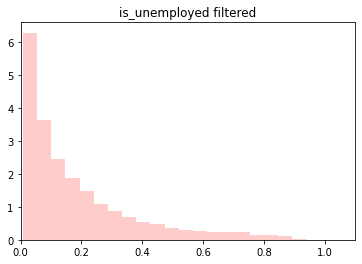

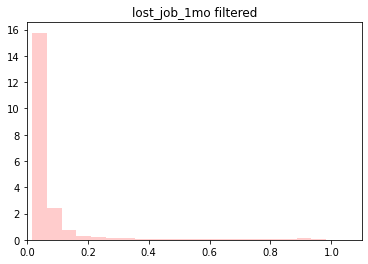

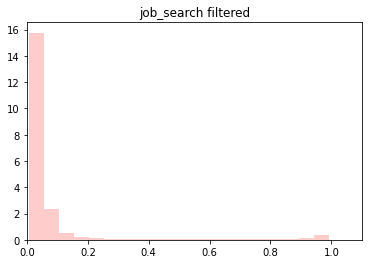

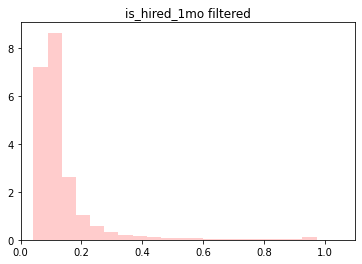

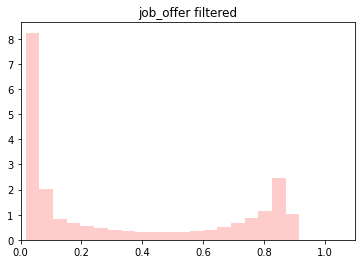

In [5]:
# all in one loop
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from scipy.special import softmax

import numpy as np
boundary_list = [i/10.0 for i in range(11)]
boundary_list.reverse()

print('boundary_list', boundary_list)

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print('\n\n', column)
    
#     if column != 'job_search': continue
    
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_BERT/{}/'.format(column)
    print(model_output_path)
    
    start_time = time.time()
    model_output_filtered = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'filtered*.csv')], ignore_index = True)
    print('time taken to load filtered sample:', str(time.time() - start_time), 'seconds', model_output_filtered.shape)

    start_time = time.time()
    merged_filtered = pd.merge(model_output_filtered, tweets_filtered, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
#     based on https://github.com/ThilinaRajapakse/simpletransformers/issues/30
    merged_filtered[['neg', 'pos_model']] = softmax(merged_filtered[['first', 'second']], axis=1)
    print('time softmax:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     pickle.dump( merged_filtered, open( "./pickles/{}_BERT_ST_merged_filtered_1pct.pkl".format(column), "wb" ) )
#     print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_filtered   = merged_filtered[['tweet_id', 'pos_model', 'text']]
#     print(merged_filtered.head())
    
    
    merged_filtered = merged_filtered.drop_duplicates(['text'])
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_filtered['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' filtered')
#     ax.set_yscale('log')
    plt.xlim(0,1.1)
    
    all_tweets_for_sam = pd.DataFrame()
    for boundary in boundary_list:
        
        print('boundary', boundary)
        
#         boundary = boundary_dict['filtered'][column]
        merged_filtered['dist_point{}'.format(boundary)] = abs(merged_filtered['pos_model'] - boundary)

        start_time = time.time()
        print(column, 'filtered subtraction time taken:', str(time.time() - start_time), 'seconds')

        start_time = time.time()
        merged_filtered = merged_filtered.sort_values(by=['dist_point{}'.format(boundary)], ascending=True)
        print(column, 'filtered sorting time taken:', str(time.time() - start_time), 'seconds')

        start_time = time.time()
        
        data_to_export = merged_filtered[:2000][['tweet_id', 'pos_model', 'text']]
#         data_to_export.to_csv('csv_boundary_step/BERT_ST_filtered_{}_point_{}.csv'.format(column, boundary))
        print(data_to_export.shape)
        print(column, 'filtered write csv time taken:', str(time.time() - start_time), 'seconds')   

        all_tweets_for_sam = pd.concat([all_tweets_for_sam, data_to_export])
    
#         break
        
    all_tweets_for_sam.to_csv('csv_boundary_step/BERT_ST_filtered_ALL_{}.csv'.format(column), index = False)
    
#     break



 is_unemployed
time taken to load random sample: 3.2467129230499268 seconds (9440641, 3)
time taken to merge: 7.704353094100952 seconds (9440641, 13)
time softmax: 1.3470361232757568 seconds
time taken to dump: 6.609426021575928 seconds
is_unemployed random subtraction time taken: 2.384185791015625e-06 seconds
is_unemployed random sorting time taken: 4.5028297901153564 seconds
is_unemployed random write csv time taken: 0.011187076568603516 seconds


 lost_job_1mo
time taken to load random sample: 3.136655569076538 seconds (9440641, 3)
time taken to merge: 8.098906993865967 seconds (9440641, 13)
time softmax: 1.292982816696167 seconds
time taken to dump: 6.134558439254761 seconds
lost_job_1mo random subtraction time taken: 2.384185791015625e-06 seconds
lost_job_1mo random sorting time taken: 4.491257429122925 seconds
lost_job_1mo random write csv time taken: 0.010523319244384766 seconds


 job_search
time taken to load random sample: 3.110830545425415 seconds (9440641, 3)
time taken t

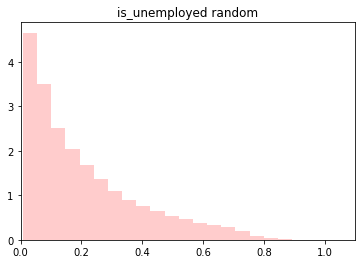

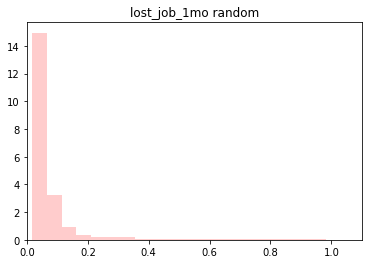

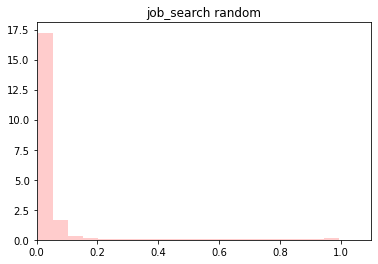

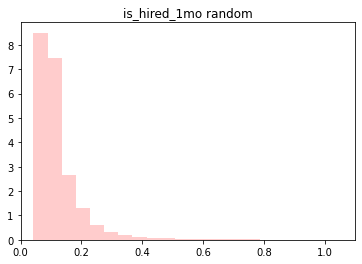

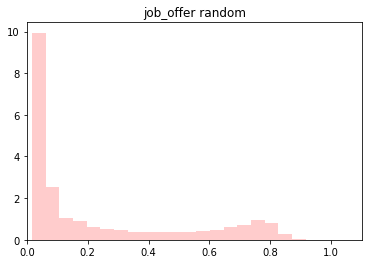

In [2]:
# exporting top 1000 and specific boundaries
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from scipy.special import softmax

boundary_dict = {
    'random':{
        "is_unemployed": 1.0,
         "lost_job_1mo": 1.0,
         "job_search": 0.98,
#          "job_search": 1.0,
        "is_hired_1mo": 1.0,
         "job_offer": 1.0
    },
#     'filtered': {
#         "is_unemployed": 0.8,
#          "lost_job_1mo": 0.75,
#          "job_search": 0.85,
#          "is_hired_1mo": 0.95,
#          "job_offer": 1.0
#     }
}

all_tweets_for_sam = pd.DataFrame()

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print('\n\n', column)
    
#     if column != 'job_search': continue
    
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_BERT/{}/'.format(column)

    start_time = time.time()
    model_output_random = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'random*.csv')], ignore_index = True)
    print('time taken to load random sample:', str(time.time() - start_time), 'seconds', model_output_random.shape)

    start_time = time.time()
    merged_random = pd.merge(model_output_random, tweets_random, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_random.shape)

    start_time = time.time()
#     based on https://github.com/ThilinaRajapakse/simpletransformers/issues/30
    merged_random[['neg', 'pos_model']] = softmax(merged_random[['first', 'second']], axis=1)
    print('time softmax:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    pickle.dump( merged_random, open( "./pickles/{}_BERT_ST_merged_random_1pct.pkl".format(column), "wb" ) )
    print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_random   = merged_random[['tweet_id', 'pos_model', 'text']]
#     print(merged_random.head())
    
    
    merged_random = merged_random.drop_duplicates(['text'])
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_random['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' random')
#     ax.set_yscale('log')
    plt.xlim(0,1.1)


#     print(column)
#     start_time = time.time()
#     sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=False)
#     print('random', sort_merged_random[['pos_model', 'text']].head())
#     sort_merged_random = sort_merged_random[['tweet_id', 'pos_model', 'text']]
#     sort_merged_random.head(1000).to_csv('csv/BERT_ST_random_pos_1000_{}.csv'.format(column), index = False)

    ## boundary save 
    
    
    boundary = boundary_dict['random'][column]
    merged_random['dist_point{}'.format(boundary)] = abs(merged_random['pos_model'] - boundary)

    start_time = time.time()
    print(column, 'random subtraction time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_random = merged_random.sort_values(by=['dist_point{}'.format(boundary)], ascending=True)
    print(column, 'random sorting time taken:', str(time.time() - start_time), 'seconds')

    start_time = time.time()
    merged_random[:1000].to_csv('csv/BERT_ST_random_{}_point_{}.csv'.format(column, boundary))
    # print(all_random_boundary['text'])
    print(column, 'random write csv time taken:', str(time.time() - start_time), 'seconds')   
    
    all_tweets_for_sam = pd.concat([all_tweets_for_sam, merged_random[:1000]])
    
    
#     break

In [ ]:
# entropy
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import numpy as np

boundary = 0.5

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print(column)
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/running_on_200Msamples/pred_output/{}/'.format(column)
    model_output_filtered = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'filtered*.csv')], ignore_index = True)
    print('time taken to load filtered sample:', str(time.time() - start_time), 'seconds', model_output_filtered.shape)


    start_time = time.time()
    model_output_random = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'random*.csv')], ignore_index = True)
    print('time taken to load random sample:', str(time.time() - start_time), 'seconds', model_output_random.shape)


    start_time = time.time()
    merged_filtered = pd.merge(model_output_filtered, tweets_filtered, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
    merged_random = pd.merge(model_output_random, tweets_random, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
    pickle.dump( merged_filtered, open( "./top_tweets/{}_merged_filtered.pkl".format(column), "wb" ) )
    pickle.dump( merged_random, open( "./top_tweets/{}_merged_random.pkl".format(column), "wb" ) )
    print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_filtered = merged_filtered[['neg_model', 'pos_model', 'text']]
    merged_random   = merged_random[['neg_model', 'pos_model', 'text']]
    
#     merged_random = merged_random[merged_random['pos_model'] > 0.5 ]

    merged_filtered['entropy'] = - merged_filtered['pos_model']*(np.log(merged_filtered['pos_model']))
    merged_random['entropy'] = - merged_random['pos_model']*(np.log(merged_random['pos_model']))
    
#     merged_filtered = merged_filtered[merged_filtered['pos_model'] > 0.5 ]

    
    print(column)
    fig = plt.figure()
    ax = plt.subplot(111)
#     plt.hist(merged_filtered['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.hist(merged_filtered['entropy'], bins=20, density = True, color = 'red', alpha = 0.2)    
    plt.title(column+' filtered')
#     ax.set_yscale('log')
#     plt.xlim(0,1.1)
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_random['entropy'], bins=20, density = True, color = 'red', alpha = 0.2)
#     plt.hist(merged_random['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' random')
#     ax.set_yscale('log')
#     plt.xlim(0,1.1)
    
#     print(column)
#     start_time = time.time()
#     sort_merged_filtered = merged_filtered.sort_values(by=['pos_model'], ascending=False)
#     sort_merged_filtered.head(100).to_csv('top_tweets/filtered_{}_pos_100.csv'.format(column))
#     print(sort_merged_filtered.head())
    
#     sort_merged_filtered = merged_filtered.sort_values(by=['pos_model'], ascending=True)
#     sort_merged_filtered.head(100).to_csv('top_tweets/filtered_{}_neg_100.csv'.format(column))
#     print(sort_merged_filtered.head())
#     print('time taken to save csv:', str(time.time() - start_time), 'seconds')

#     print(column)
#     start_time = time.time()
#     sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=False)
#     sort_merged_random.head(100).to_csv('top_tweets/random_{}_pos_100.csv'.format(column))
#     print(sort_merged_random.head())
    
#     sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=True)
#     sort_merged_random.head(100).to_csv('top_tweets/random_{}_neg_100.csv'.format(column))
#     print(sort_merged_random.head())
#     print('time taken to save csv:', str(time.time() - start_time), 'seconds')


#     merged_filtered['dist_point5'] = abs(merged_filtered['pos_model'] - boundary)

#     start_time = time.time()
#     print(column, 'filtered subtraction time taken:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     merged_filtered = merged_filtered.sort_values(by=['dist_point5'], ascending=True)
#     print(column, 'filtered sorting time taken:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     merged_filtered[:100].to_csv('top_tweets/filtered_{}_point5.csv'.format(column))
#     # print(all_filtered_boundary['text'])
#     print(column, 'filtered write csv time taken:', str(time.time() - start_time), 'seconds')


#     merged_random['dist_point5'] = abs(merged_random['pos_model'] - boundary)

#     start_time = time.time()
#     print(column, 'random subtraction time taken:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     merged_random = merged_random.sort_values(by=['dist_point5'], ascending=True)
#     print(column, 'random sorting time taken:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     merged_random[:100].to_csv('top_tweets/random_{}_point5.csv'.format(column))
#     # print(all_random_boundary['text'])
#     print(column, 'random write csv time taken:', str(time.time() - start_time), 'seconds')    
    
    
#     break